# Esercizio 9

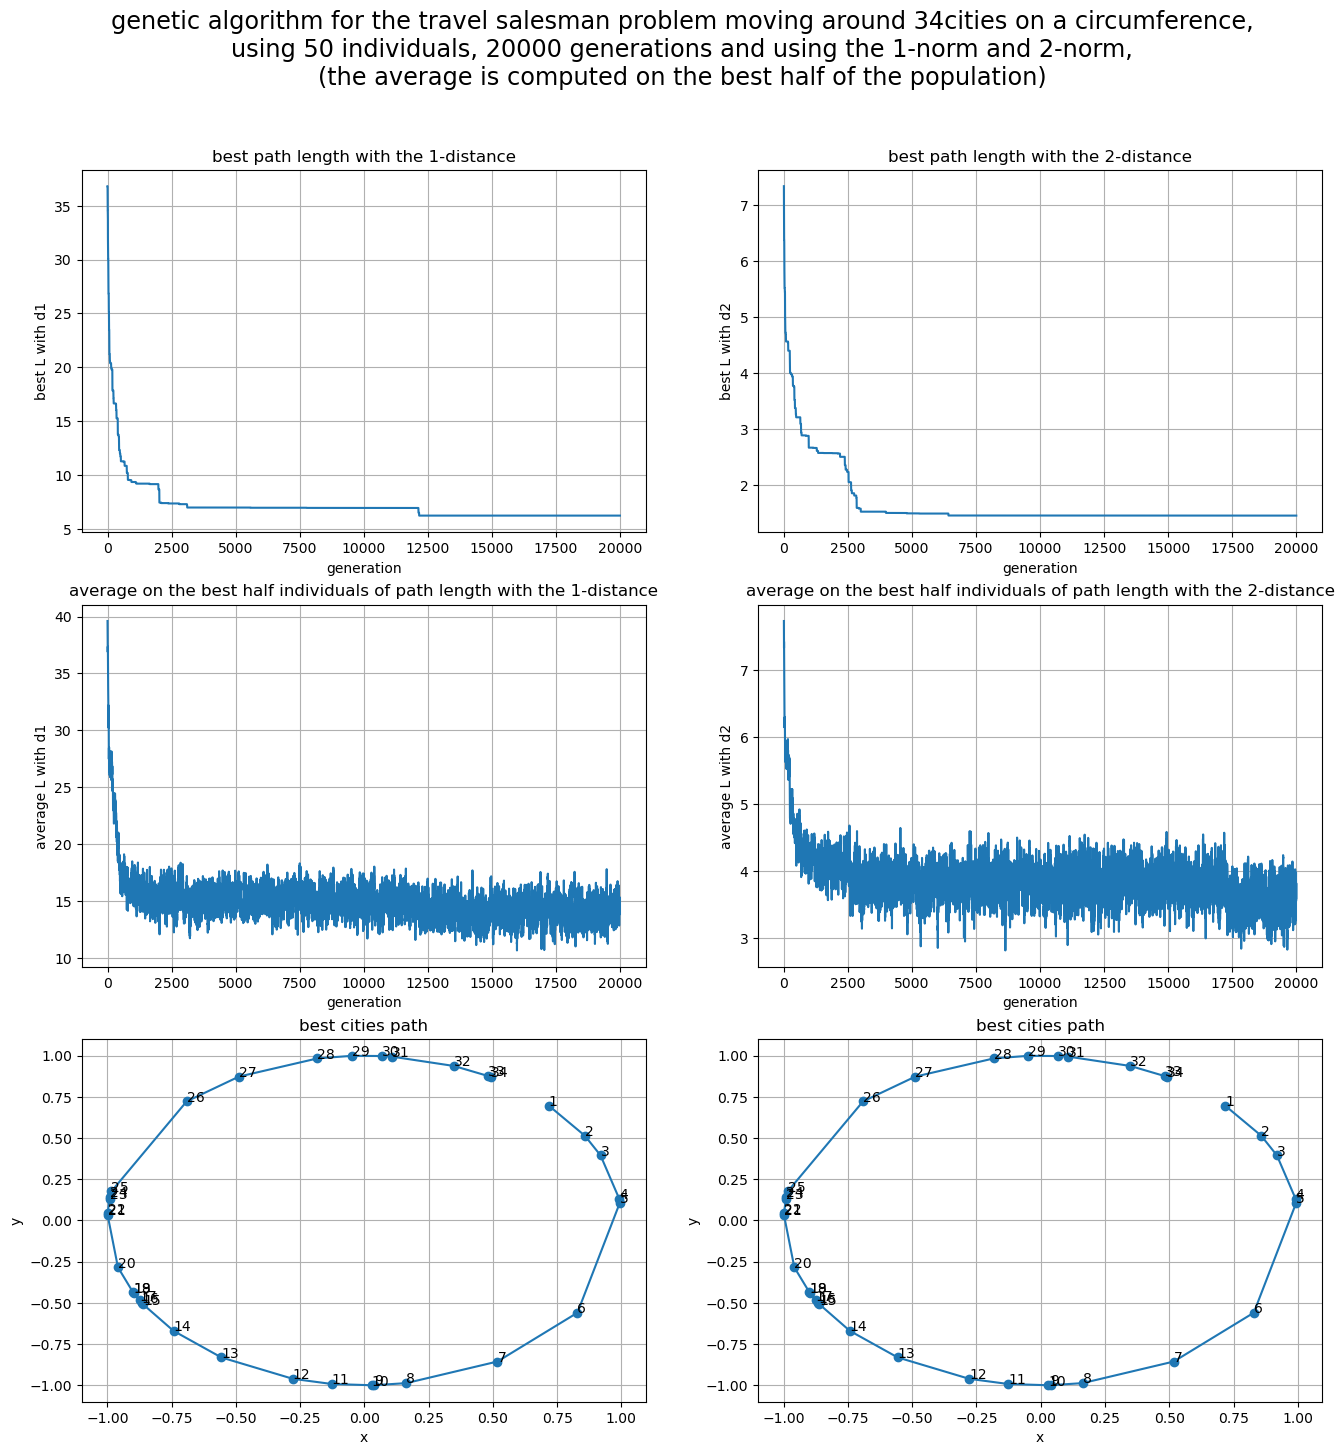

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

with open('./input.txt', 'r') as file:
    contents = file.readlines()
    
    prob_mut      = float(contents[0])
    prob_cros     = float(contents[1])
    n_cities      = int(contents[2])
    pop_size      = int(contents[3])
    norm_power    = int(contents[4])
    n_generations = int(contents[5])
    config        = contents[6]

L1_best = np.loadtxt("./best_path_circumference_1norm.txt")
L1_ave  = np.loadtxt("./average_length_circumference_1norm.txt")
L1_xy   = np.loadtxt("./best_path_circumference_xy_1norm.txt")
L2_best = np.loadtxt("./best_path_circumference_2norm.txt")
L2_ave  = np.loadtxt("./average_length_circumference_2norm.txt")
L2_xy   = np.loadtxt("./best_path_circumference_xy_2norm.txt")

fig, ax = plt.subplots(3,2,figsize=(16, 16))

ax[0,0].plot(L1_best[:,0], L1_best[:,1])
ax[0,0].set_xlabel('generation')
ax[0,0].set_ylabel('best L with d1')
ax[0,0].set_title("best path length with the 1-distance")

ax[0,1].plot(L2_best[:,0], L2_best[:,1])
ax[0,1].set_xlabel('generation')
ax[0,1].set_ylabel('best L with d2')
ax[0,1].set_title("best path length with the 2-distance")

ax[1,0].plot(L1_ave[:,0], L1_ave[:,1])
ax[1,0].set_xlabel('generation')
ax[1,0].set_ylabel('average L with d1')
ax[1,0].set_title("average on the best half individuals of path length with the 1-distance")

ax[1,1].plot(L2_ave[:,0], L2_ave[:,1])
ax[1,1].set_xlabel('generation')
ax[1,1].set_ylabel('average L with d2')
ax[1,1].set_title("average on the best half individuals of path length with the 2-distance")

ax[2,0].plot(L1_xy[:-1,1], L1_xy[:-1,2], '-o')
ax[2,0].set_xlabel('x')
ax[2,0].set_ylabel('y')
ax[2,0].set_title("best cities path")

ax[2,1].plot(L2_xy[:-1,1], L2_xy[:-1,2], '-o')
ax[2,1].set_xlabel('x')
ax[2,1].set_ylabel('y')
ax[2,1].set_title("best cities path")

for i in range(n_cities):
    ax[2,0].text(L1_xy[i, 1], L1_xy[i, 2], str(i+1))
    ax[2,1].text(L2_xy[i, 1], L2_xy[i, 2], str(i+1))

for i in range(3):
    for j in range(2):
        ax[i,j].grid(True)
        
plt.suptitle("genetic algorithm for the travel salesman problem moving around "+str(n_cities)+"cities on a circumference,\nusing "+str(pop_size)+" individuals, "+str(n_generations)+" generations and using the 1-norm and 2-norm,\n(the average is computed on the best half of the population)", size='xx-large')
#plt.tight_layout()
plt.show()

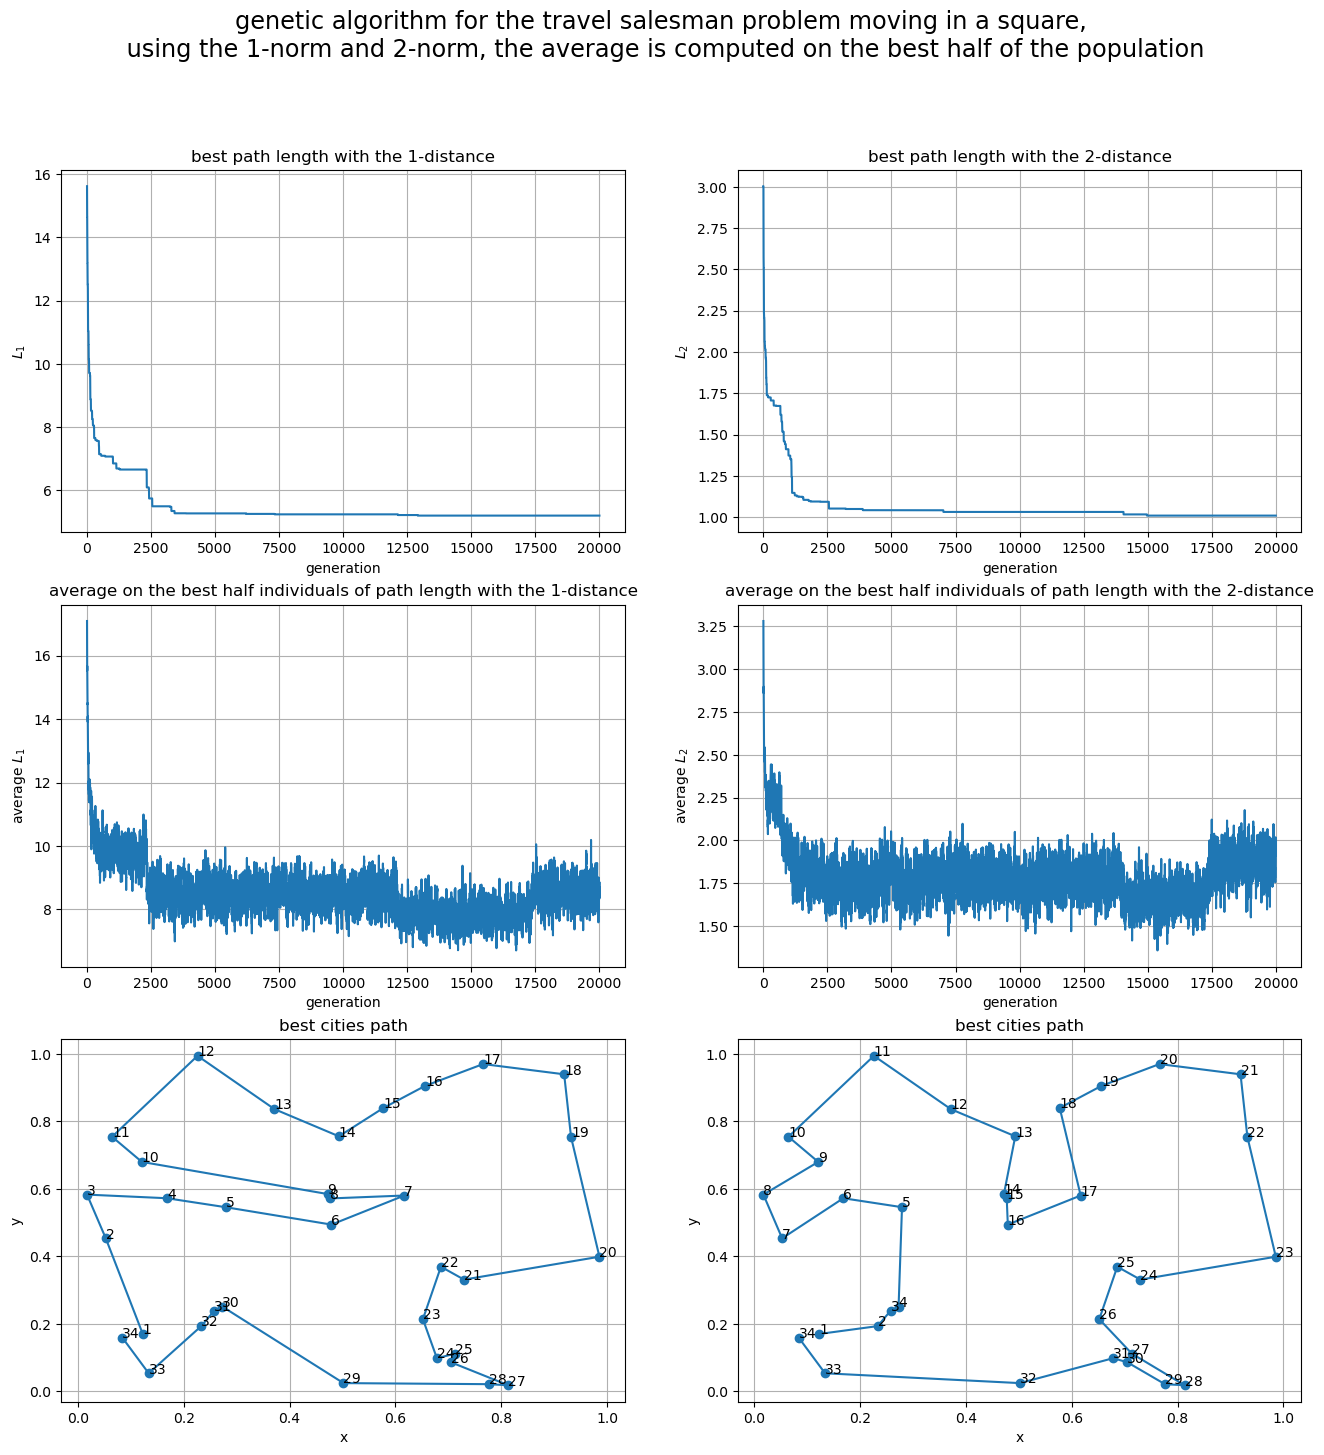

In [6]:
L1_best = np.loadtxt("./best_path_square_1norm.txt")
L1_ave  = np.loadtxt("./average_length_square_1norm.txt")
L1_xy   = np.loadtxt("./best_path_square_xy_1norm.txt")
L2_best = np.loadtxt("./best_path_square_2norm.txt")
L2_ave  = np.loadtxt("./average_length_square_2norm.txt")
L2_xy   = np.loadtxt("./best_path_square_xy_2norm.txt")

fig, ax = plt.subplots(3,2,figsize=(16, 16))

ax[0,0].plot(L1_best[:,0], L1_best[:,1])
ax[0,0].set_xlabel('generation')
ax[0,0].set_ylabel(r'$L_1$')
ax[0,0].set_title("best path length with the 1-distance")

ax[0,1].plot(L2_best[:,0], L2_best[:,1])
ax[0,1].set_xlabel('generation')
ax[0,1].set_ylabel(r'$L_2$')
ax[0,1].set_title("best path length with the 2-distance")

ax[1,0].plot(L1_ave[:,0], L1_ave[:,1])
ax[1,0].set_xlabel('generation')
ax[1,0].set_ylabel(r'average $L_1$')
ax[1,0].set_title("average on the best half individuals of path length with the 1-distance")

ax[1,1].plot(L2_ave[:,0], L2_ave[:,1])
ax[1,1].set_xlabel('generation')
ax[1,1].set_ylabel(r'average $L_2$')
ax[1,1].set_title("average on the best half individuals of path length with the 2-distance")

ax[2,0].plot(L1_xy[:-1,1], L1_xy[:-1,2], '-o')
ax[2,0].set_xlabel('x')
ax[2,0].set_ylabel('y')
ax[2,0].set_title("best cities path")

ax[2,1].plot(L2_xy[:-1,1], L2_xy[:-1,2], '-o')
ax[2,1].set_xlabel('x')
ax[2,1].set_ylabel('y')
ax[2,1].set_title("best cities path")

for i in range(n_cities):
    ax[2,0].text(L1_xy[i, 1], L1_xy[i, 2], str(i+1))
    ax[2,1].text(L2_xy[i, 1], L2_xy[i, 2], str(i+1))
    
for i in range(3):
    for j in range(2):
        ax[i,j].grid(True)
        
plt.suptitle("genetic algorithm for the travel salesman problem moving in a square,\n using the 1-norm and 2-norm, the average is computed on the best half of the population", size='xx-large')
plt.show()

Qui sotto confronto la lunghezza dei percorsi ottenuti usando l'algoritmo con la norma L1 e quello con la norma L2. L'algortimo con la norma L2 ha ottenuto un risultato peggiore con le stesse condizioni iniziali (probabilità di mutazione e crossing over, numero di individui e numero di generazioni), forse perchè la norma L2 è più "stringente" cioè rende più favorevoli le mutazioni che abbreviano il percorso anche di poco, ma ciò rende l'algoritmo meno efficiente nel trovare il minimo assoluto e rende più alta la probabilità che l'algoritmo si fermi in un minimo locale.

In [7]:
import math
def distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)
 
def path_length(path):
    d=0
    sum=0
    for i in range(len(path)-1):
        d = distance(path[i,1], path[i,2], path[i+1, 1],path[i+1,2])
        sum += d
    return sum

L_alg1 = path_length(L1_xy)
L_alg2 = path_length(L2_xy)

print("the path length computed with L1 norm of the path obtained \n with the genetic algorithm that used the L1 norm is L=", L_alg1)
print("the path length computed with L1 norm of the path obtained \n with the genetic algorithm that used the L2 norm is L=", L_alg2)


the path length computed with L1 norm of the path obtained 
 with the genetic algorithm that used the L1 norm is L= 5.19898328318683
the path length computed with L1 norm of the path obtained 
 with the genetic algorithm that used the L2 norm is L= 5.017442380906997
